Bibliotecas de requisito

In [37]:
!pip install -q pandas seaborn matplotlib scikit-learn opencv-python scikit-image

# Exercício 1 - Machine Learning

***Orientações:*** O Mercado Pago implementou recentemente uma campanha de marketing
referente a um novo produto do Mercado Crédito. Esta campanha é baseada
em marketing direto (ligações telefônicas) e visa entender a
comportamento dos clientes entrevistados para construir modelos que
nos permitem prever o comportamento de clientes desconhecidos. 
Para isso a MELI, coletou um conjunto de dados que se destina a ser utilizado na construção de
Modelos de aprendizado de máquina. Uma vez que esses dados tenham sido coletados e analisados,
requer a implementação de uma *Prova de Conceito* para um modelo que utiliza o
informações fornecidas para fazer previsões sobre o comportamento de
novos clientes.
A sua missão, caso decida aceitá-la, é validar se é possível construir uma
modelo que atenda a esse requisito, passando por todas as fases clássicas de
um problema de aprendizagem de máquina (compreensão do problema, análise dos dados,
treinar e avaliar o modelo, o que está sendo levado em consideração ao executar
previsões, análise de erros, etc.) usando boas práticas de programação
e explicando cada etapa.

## Com isso,
Dado que nosso objetivo é construir um modelo f(X) -> y, onde:
- X é o conjunto de características (features) de um cliente.
- y é a nossa variável-alvo, que pode ser 1 (cliente aceitou a oferta) ou 0 (cliente não aceitou a oferta).

Considerando que, a ideia é otimizar a campanha de marketing. Isso significa aumentar a taxa de conversão (mais aceites) e/ou reduzir custos (ligar para menos pessoas que não têm interesse).

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [4]:
df = pd.read_csv('MeliDataset.csv',sep= ';', encoding='utf-8') # Utilizando o separador corrreto dada a base, e o encoding correto.

### Inspecionando a natureza dos dados, como dimensões, tipos, médias e assim por diante.

In [5]:
df.shape

(41188, 21)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Preparando a base de dados

Dividimos em treino e teste , além de usarmos 'stratify' para garantir que a proporção de 'y' seja a mesma nos dois conjuntos

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['y']) 
print(f'Train: {len(train)}')
print(f'Test: {len(test)}')


Train: 32950
Test: 8238


### Agora, vamos analisar os dados de forma categórica

/var/folders/sm/wks1nk410cqg8yr78yrtlrw80000gn/T/ipykernel_32528/2039270673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=train, palette='viridis', order=train['job'].value_counts().index)


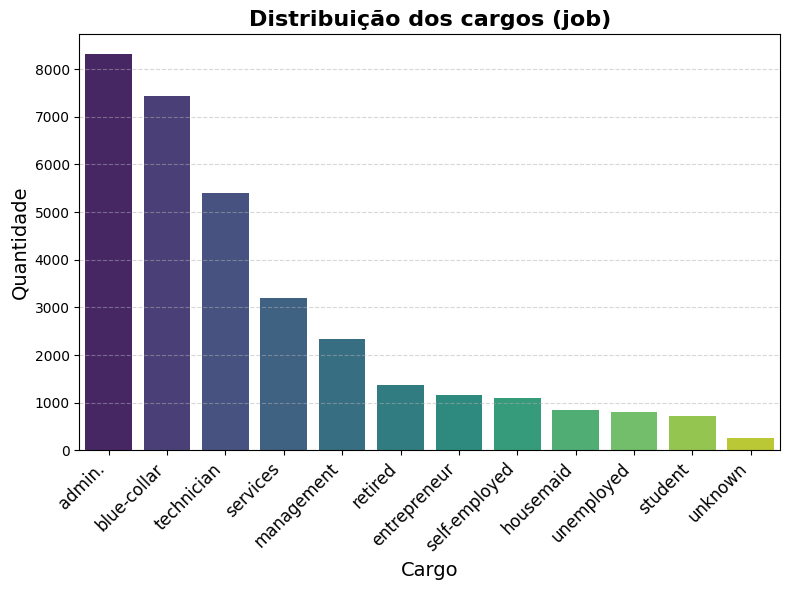

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='job', data=train, palette='viridis', order=train['job'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Distribuição dos cargos (job)', fontsize=16, fontweight='bold')
plt.xlabel('Cargo', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

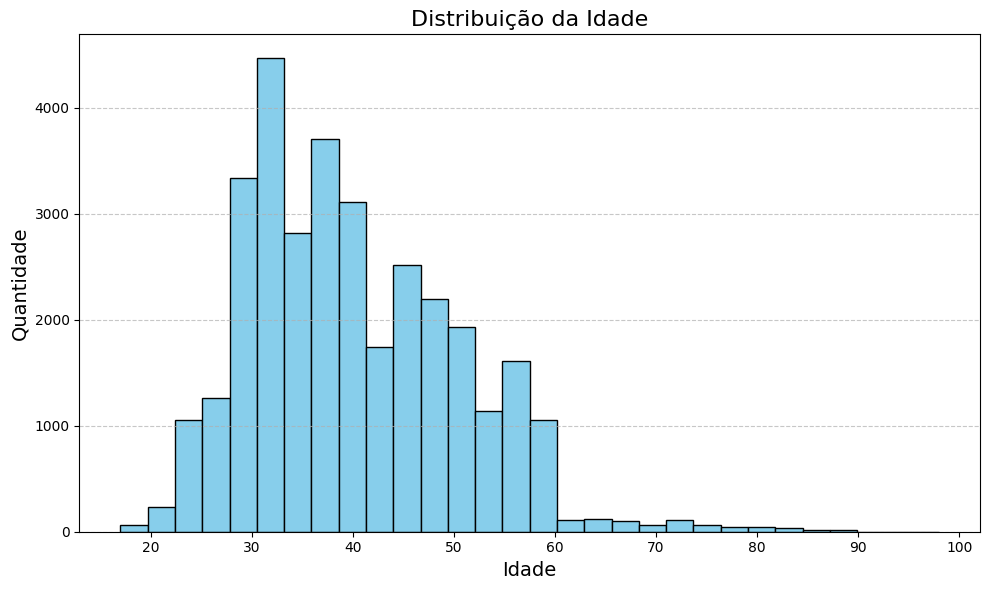

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(train['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

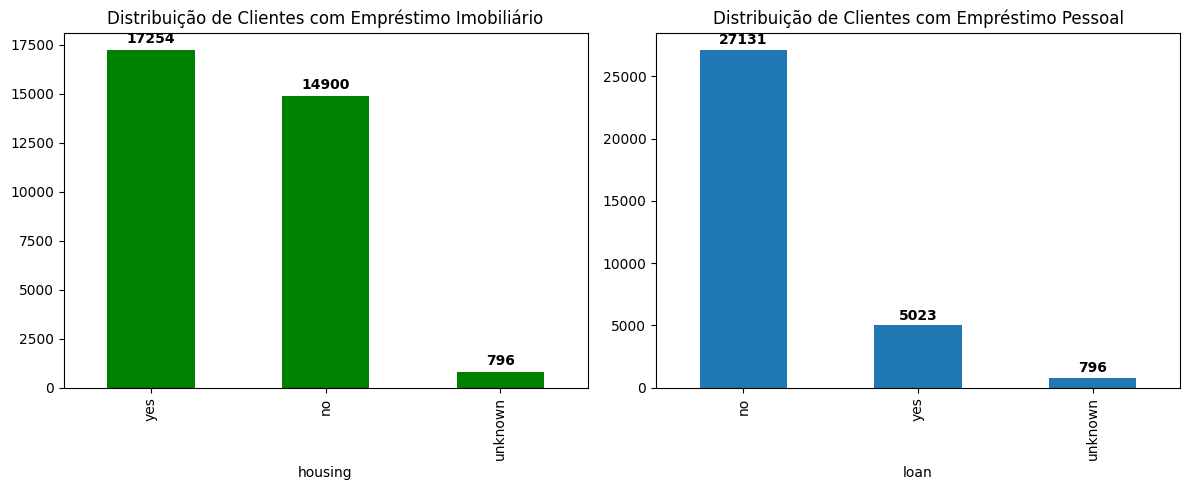

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

housing_counts = train['housing'].value_counts()
loan_counts = train['loan'].value_counts()

housing_counts.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Distribuição de Clientes com Empréstimo Imobiliário')
for i, v in enumerate(housing_counts):
    axes[0].text(i, v + 200, str(v), ha='center', va='bottom', fontweight='bold')

loan_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribuição de Clientes com Empréstimo Pessoal')
for i, v in enumerate(loan_counts):
    axes[1].text(i, v + 200, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

Para melhor análise, vamos fazer uma correlação direta com as features em relação à nossa variável alvo.

In [13]:
# Afim, de verificar a distribuição da variável alvo
train['y'].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

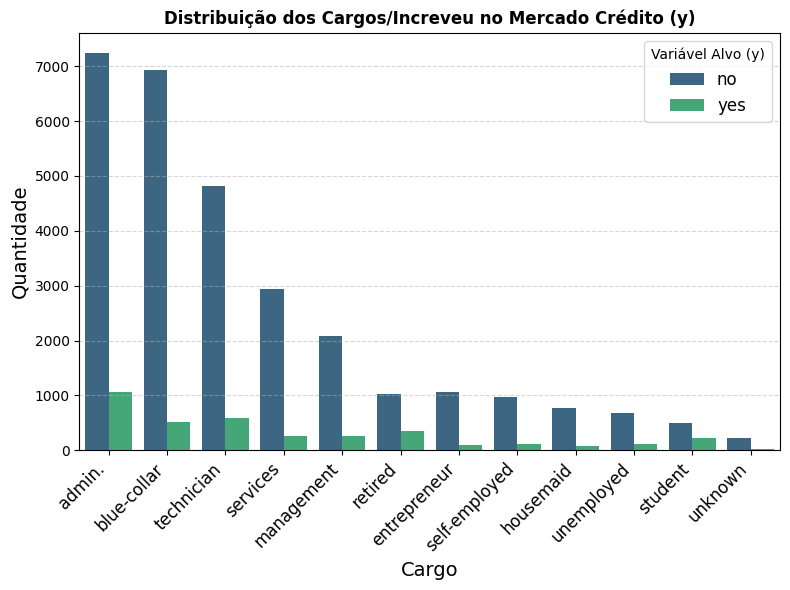

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='job', hue='y', data=train, palette='viridis', order=train['job'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Distribuição dos Cargos/Increveu no Mercado Crédito (y)', fontsize=12, fontweight='bold')
plt.xlabel('Cargo', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.legend(title='Variável Alvo (y)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

/var/folders/sm/wks1nk410cqg8yr78yrtlrw80000gn/T/ipykernel_32528/2665056771.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Variável Alvo (y)', fontsize=12)


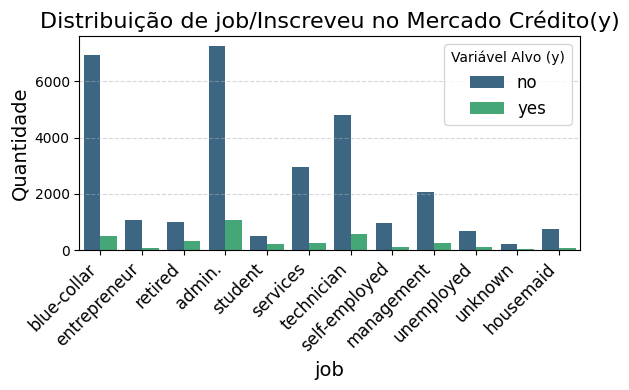

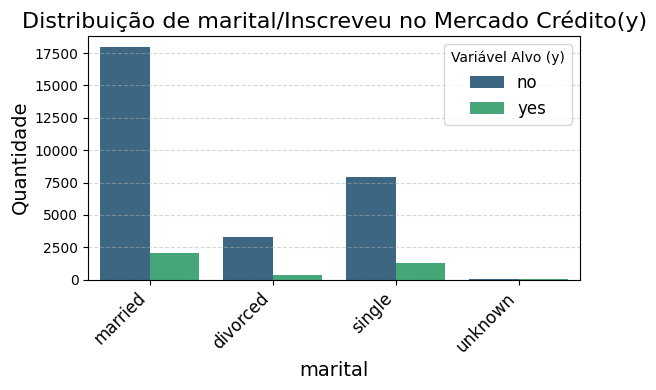

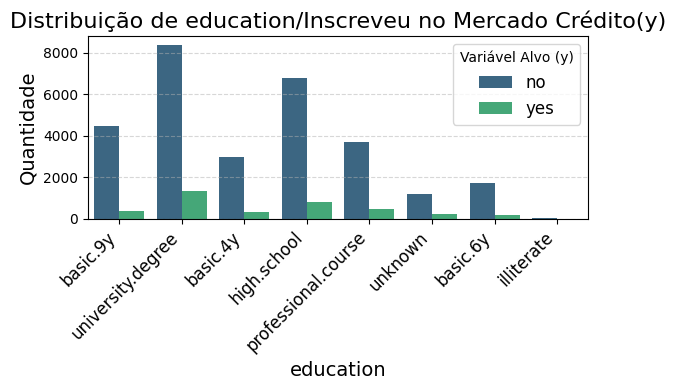

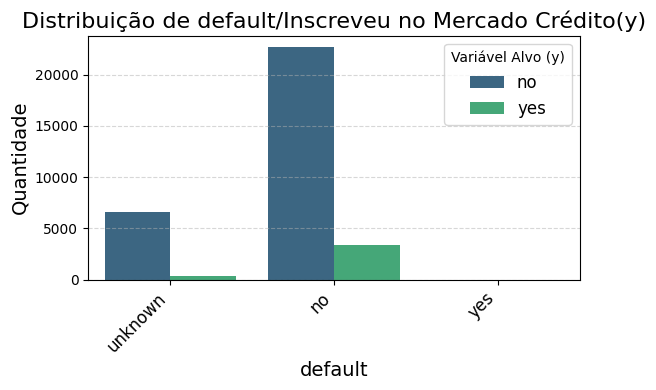

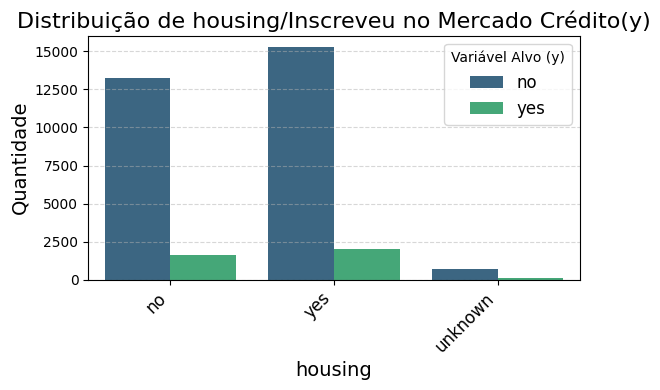

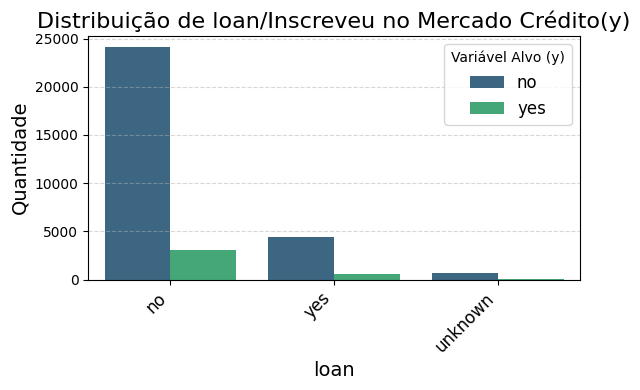

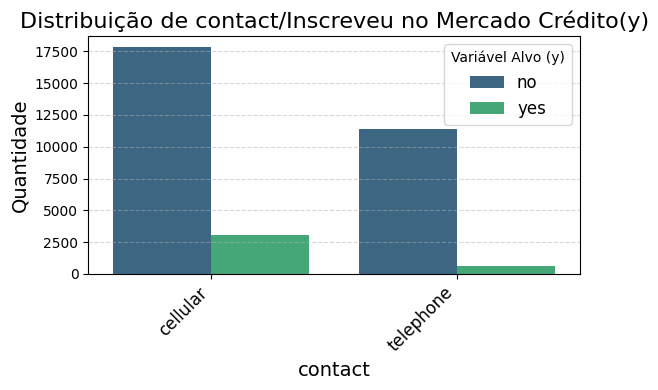

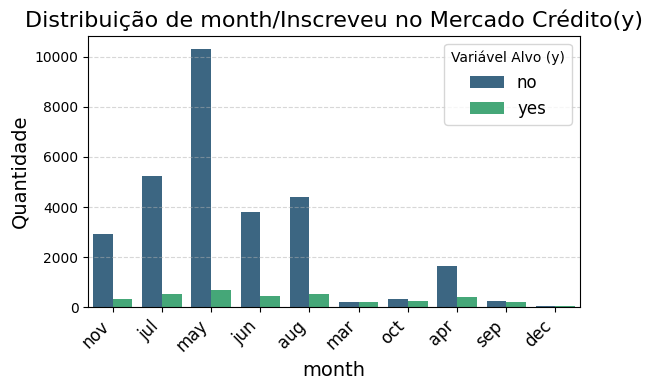

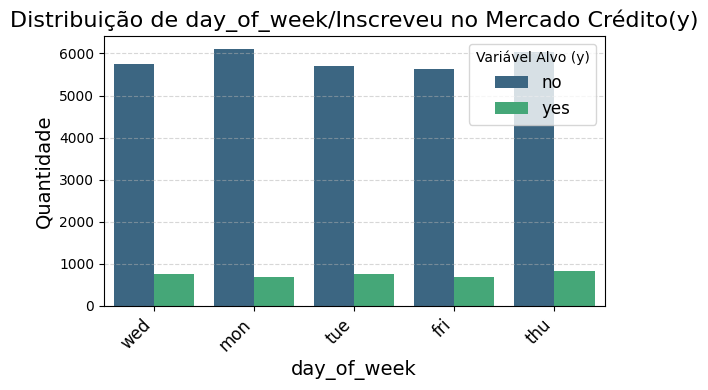

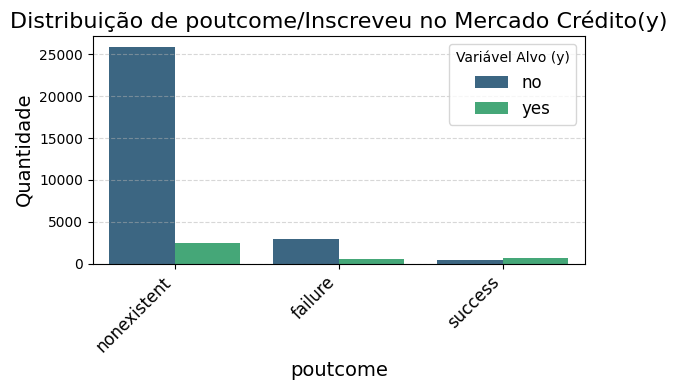

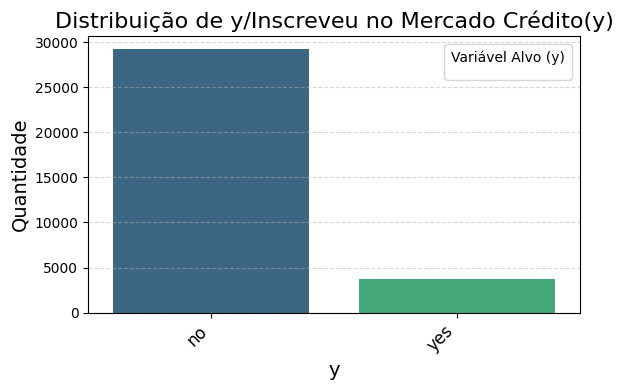

In [15]:
for column in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue='y', data=train, palette='viridis')
    plt.title(f'Distribuição de {column}/Inscreveu no Mercado Crédito(y)', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Quantidade', fontsize=14)
    plt.legend(title='Variável Alvo (y)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

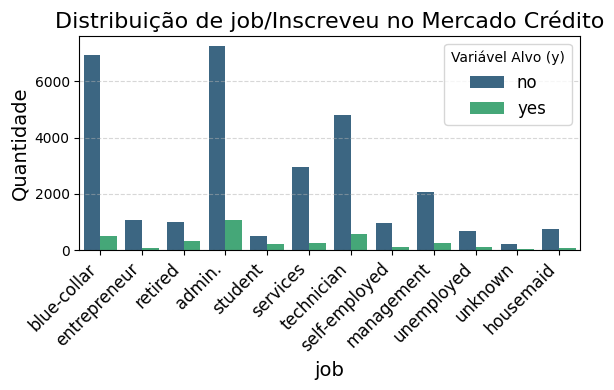

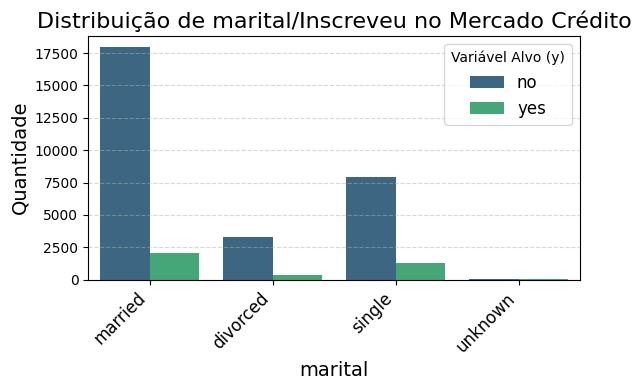

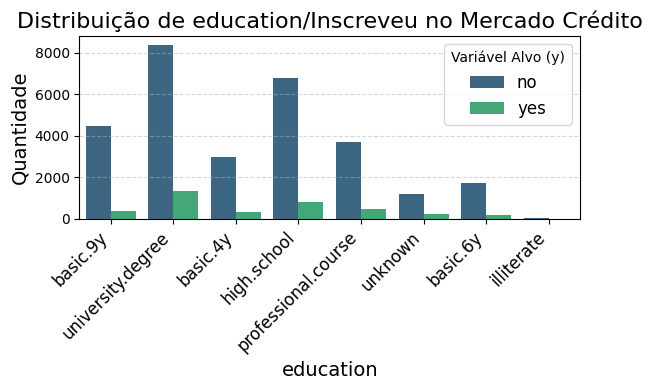

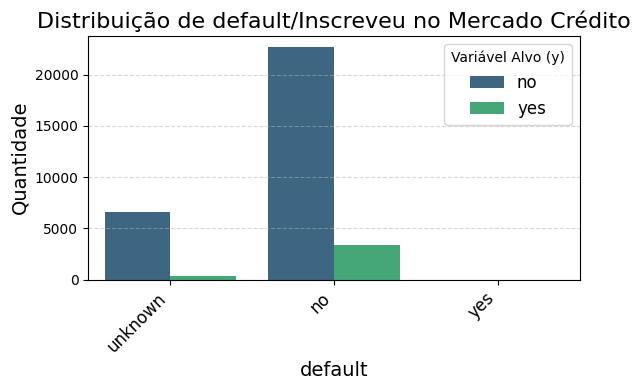

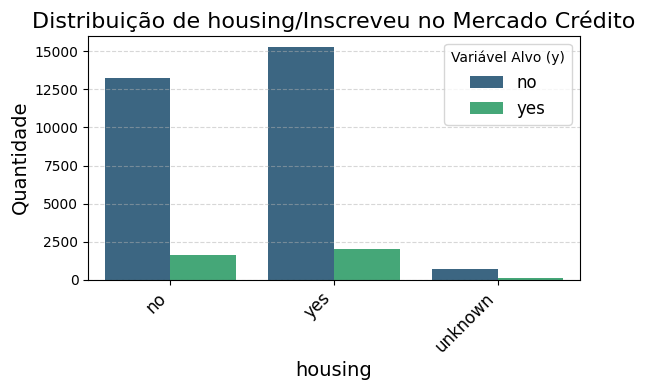

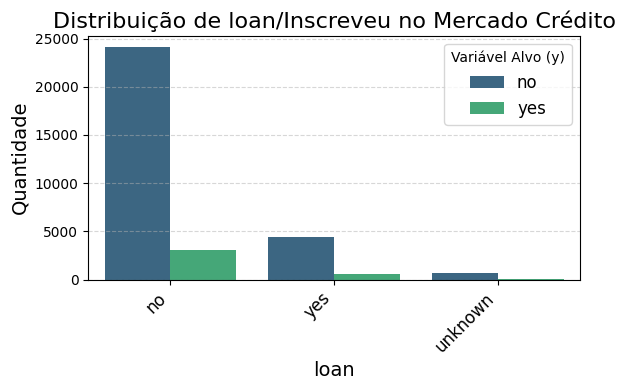

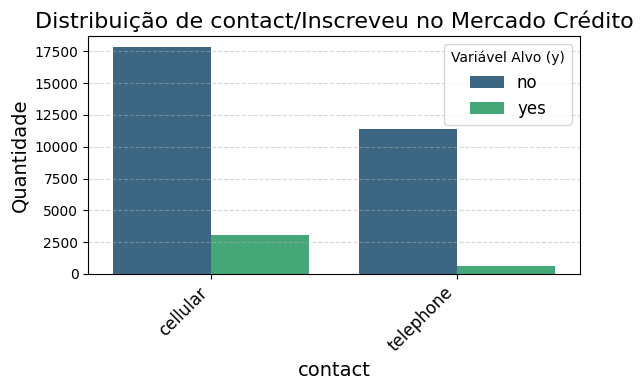

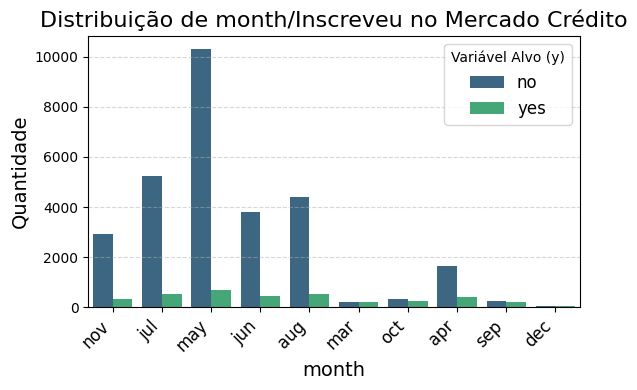

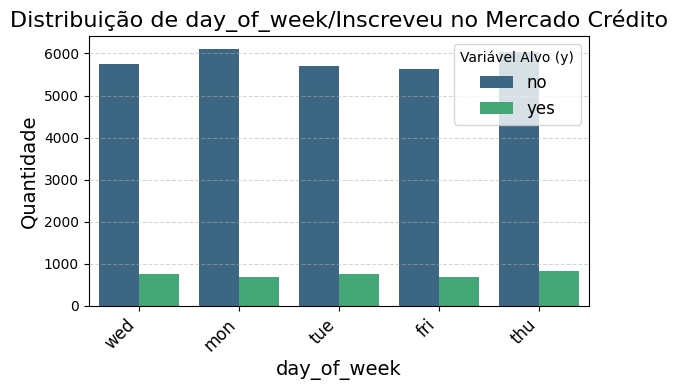

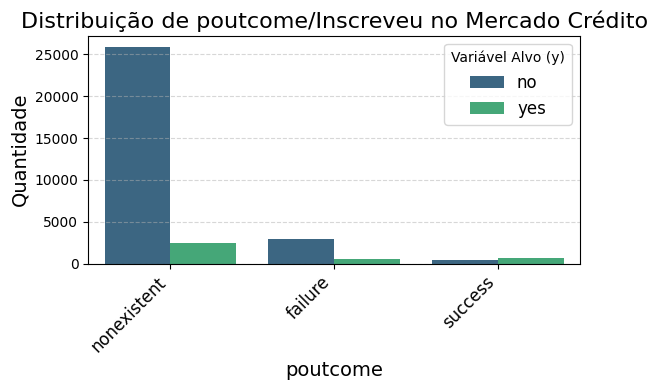

In [16]:
for column in train.select_dtypes(include=['object']).columns:
    if column != 'y':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, hue='y', data=train, palette='viridis')
        plt.title(f'Distribuição de {column}/Inscreveu no Mercado Crédito', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Quantidade', fontsize=14)
        plt.legend(title='Variável Alvo (y)', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()


### Agora para uma análise de correlação
> Selecionamos apenas as colunas numéricas para calcular a matriz de correlação, temos que:


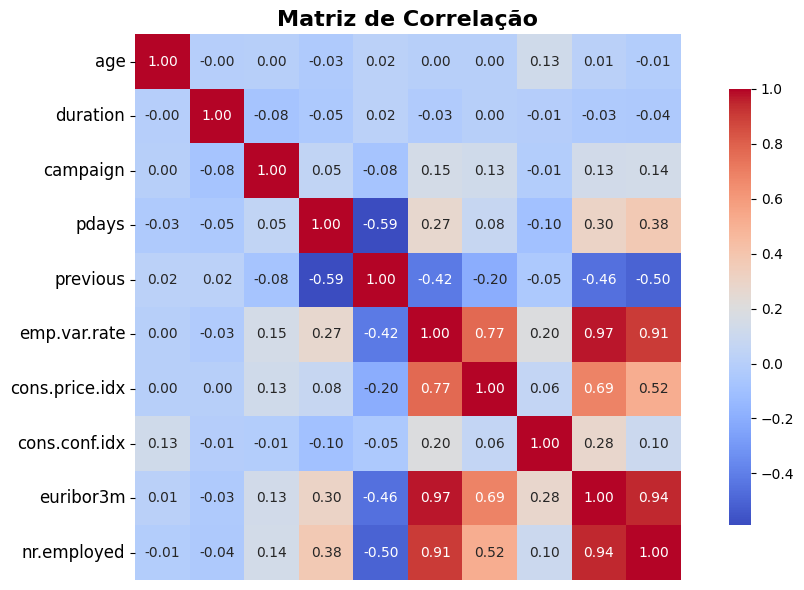

In [17]:
corr_matrix = train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação', fontsize=16, fontweight='bold')
plt.xticks([])
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

Como podemos perceber acima:
> A matriz nos demonstra que, temos um caso de multicolinearidade entre as variáveis socioeconômicas. Com isso, podemos assumir que para nosso modelo, é mais eficaz selecionarmos a variável mais representativa desse grupo(emp.var.rate, euribor3m, nr.employed) e remover as outras para construir um modelo mais robusto.

### Passando para o pré-processamento e tratamento dos dados

Para evitar enviezamento, iremos dropar coluna 'y' do conjunto de treino pois ela é a variável alvo.


In [18]:
X_train = train.drop(columns=['y'])
y_train = train['y']

Vamos tratar os valores nulos identificados com a inputação da média para as colunas numéricas e a moda para as colunas categóricas.


In [19]:
for column in X_train.select_dtypes(include=['number']).columns:
    X_train[column].fillna(X_train[column].mean(), inplace=True)

for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column].fillna(X_train[column].mode()[0], inplace=True)

/var/folders/sm/wks1nk410cqg8yr78yrtlrw80000gn/T/ipykernel_32528/4067060221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].mean(), inplace=True)
/var/folders/sm/wks1nk410cqg8yr78yrtlrw80000gn/T/ipykernel_32528/4067060221.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Precisamos normalizar os dados numéricos, com o MinMaxScaler.


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

Agora, vamos usar encondig para transformar as colunas categóricas em numéricas.


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le


LabelEncoder para y_train

In [22]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

Aplicando K-Fold

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Treinamento e Avaliação do Modelo

In [24]:
# Agoram vamos treinar o modelo de classificação. Vamos usar o RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=42)

#model = GradientBoostingClassifier(n_estimators=1000, random_state=42) -> Não funcionou bem com a base, mas é uma alternativa interessante.
#model = ExtraTreesClassifier(n_estimators=1000, random_state=42) -> Obteve o pior resultados dentre as três.

Para armazena os resultados de cada fold:

In [25]:
accuracy_r = []
balanced_accuracy_r = []
precision_r = []
recall_r = []
f1_r = []

models = []

Treinamento dos Folds

In [26]:
for train_index,val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model = RandomForestClassifier(n_estimators=1000, random_state=42) # Para resetar o modelo a cada iteração.
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    models.append(model)
    
    accuracy = metrics.accuracy_score(y_val_fold, y_pred)
    ballance = metrics.balanced_accuracy_score(y_val_fold, y_pred)
    precision = metrics.precision_score(y_val_fold, y_pred)
    recall = metrics.recall_score(y_val_fold, y_pred)
    f1 = metrics.f1_score(y_val_fold, y_pred)
    
    accuracy_r.append(accuracy)
    balanced_accuracy_r.append(ballance)
    precision_r.append(precision)
    recall_r.append(recall)
    f1_r.append(f1)
    print(f'Fold Accuracy: {accuracy:.4f}, Balanced Accuracy: {ballance:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    

Fold Accuracy: 0.9073, Balanced Accuracy: 0.7309, Precision: 0.6486, Recall: 0.4987, F1 Score: 0.5639
Fold Accuracy: 0.9121, Balanced Accuracy: 0.7373, Precision: 0.6033, Recall: 0.5149, F1 Score: 0.5556
Fold Accuracy: 0.9159, Balanced Accuracy: 0.7425, Precision: 0.6678, Recall: 0.5180, F1 Score: 0.5835
Fold Accuracy: 0.9121, Balanced Accuracy: 0.7229, Precision: 0.6654, Recall: 0.4769, F1 Score: 0.5556
Fold Accuracy: 0.9140, Balanced Accuracy: 0.7341, Precision: 0.6237, Recall: 0.5049, F1 Score: 0.5581


Considerando que, 
> A acurácia balanceada leva em consideração a proporção entre as classes.
>
> A precisão vai nos demonstrar, dos clientes que o modelo previu que aceitariam, quantos realmente aceitariam.
>
> O 'Recall' demonstra quem dos clientes realmente aceitariam as ofertas.
>
> O 'F1-Score' mostra a média harmônica entre a Precisão e Recall.


Escolhendo o melhor modelo dentre os Folds

In [27]:
best_model = models[2]

Agora, plotamos a matriz de confusão para averiguar a quantidade de falsos positivos e negativos do modelo

(array([0.5, 1.5]), [Text(0.5, 0, 'no'), Text(1.5, 0, 'yes')])

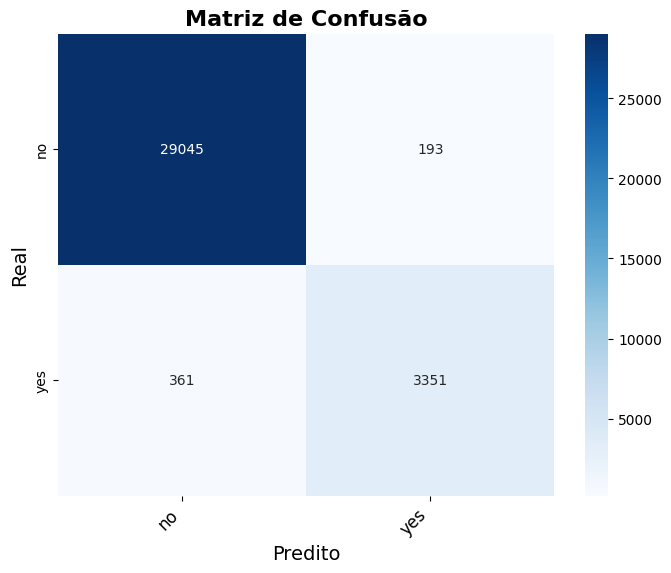

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = best_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
plt.xlabel('Predito', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 


In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_pred, target_names=le_y.classes_)
print(report)

              precision    recall  f1-score   support

          no       0.99      0.99      0.99     29238
         yes       0.95      0.90      0.92      3712

    accuracy                           0.98     32950
   macro avg       0.97      0.95      0.96     32950
weighted avg       0.98      0.98      0.98     32950



Considerando nossa problemática, e analisando o fato de que falsos negativos seriam mais prejudiciais ao nosso modelo, visto que, seria mais impactante a economia da empresa.
É essencial 'sacrificar' um pouco da acurácia da classe *não*, para ganhar mais na classe *sim*, a qual é em menor escala.

# Exercício 2 - Computer Vision

***Orientações:*** Nosso sistema de registro de documentos do usuário está apresentando uma falha e
Nossos especialistas descobriram o problema. Para resolver isso precisamos da ajuda de
um profissional de visão computacional que tenta resolver o seguinte requisito: 
- SEM Utilizar modelos de Aprendizado de Máquina, construa um sistema que, dada uma fotografia de um
o cliente determina automaticamente a orientação do rosto dentro da imagem, como
mostrado na imagem.

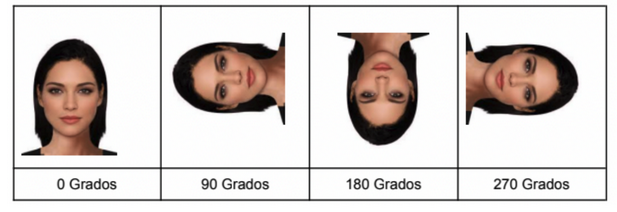

### ***Com isso,*** 

Com o objetivo de fazermos um codigo capaz de detectar a orientação de rosta em imagens sem utilizar um modelo ja construido, podemos utilizar técnicas com a biblioteca OpenCV para as imagens e detectar as imagens.

***OBS: Considerando também que como no exemplo dado, o sentido correspondente a rotação de 90 graus, corresponde ao sentido anti-horário.***


In [124]:
import cv2 # OpenCV para o processamento de imagens
import numpy as np # NumPy para manipulação de arrays
from skimage.metrics import structural_similarity as ssim # scikit-image para calcular a similaridade estrutural

Se considerarmos que, a face humana é aproximadamente simétrica em relação ao eixo vertical quando em posição frontal (0° ou 180°), e em relação ao eixo horizontal quando rotacionada em 90° ou 270°.

Com isso, é possível detectar a orientação mais provável observando o grau de simetria entre as duas metades da imagem, após rotacioná-la.

Dessa forma, seguimos o passo a passo de:
1. Recebe o caminho de uma imagem como entrada.
2. Realiza um pré-processamento (conversão para escala de cinza e redimensionamento).
3. Executa a análise de simetria para encontrar os dois melhores ângulos.
4. Aplica a análise de densidade de cantos para selecionar o ângulo final.
5. Retorna a orientação correta (0°, 90°, 180° ou 270°).

A função abaixo, tem o objetivo de avaliar a simetria vertical de uma imagem.
Retornando um score de similaridade estrutural (SSIM) entre a metade esquerda e a direita (espelhada).

In [126]:
def avaliar_simetria_vertical(img):
    h, w = img.shape
    if w % 2 != 0:
        w = w - 1
        img = img[:, :w]
        
    left = img[:, :w//2]
    right_flipped = cv2.flip(img[:, w//2:], 1)
    
    return ssim(left, right_flipped)

Temos tambem, a função responsável por 'desempatar' entre uma orientação "em pé" e "de cabeça para baixo".
Ao conta os cantos (features) na metade superior e inferior da imagem, e considerar que a orientação correta é aquela que corresponde à distribuição de features esperada.
Principalmente, porque verificou-se que a metade superior (testa, sobrancelhas, cabelo) tende a ter mais "cantos" detectados pelo algoritmo Harris. Portanto, a orientação correta é aquela onde o topo tem mais features.

In [ ]:
def desempatar_por_features(img):
    h, w = img.shape
    # Adicionamos um pequeno buffer para garantir que os olhos fiquem na metade inferior
    offset = int(h * 0.1) 
    top_half = img[:h//2 - offset, :]
    bottom_half = img[h//2 - offset:, :]

    top_half_float = np.float32(top_half)
    bottom_half_float = np.float32(bottom_half)
    
    dst_top = cv2.cornerHarris(top_half_float, 2, 3, 0.04)
    dst_bottom = cv2.cornerHarris(bottom_half_float, 2, 3, 0.04)
    
    corners_top = (dst_top > 0.01 * dst_top.max()).sum()
    corners_bottom = (dst_bottom > 0.01 * dst_bottom.max()).sum()
    
    return corners_top > corners_bottom

def detectar_orientacao_rosto(img_path):
    """
    Detecta a orientação do rosto em uma imagem usando uma abordagem híbrida:
    1. Filtra as melhores orientações por simetria vertical.
    2. Desempata usando a distribuição de features (cantos) no rosto.
    """
    try:
        imagem_original = cv2.imread(img_path)
        if imagem_original is None:
            return f"Erro: Não foi possível ler a imagem em '{img_path}'"
            
        imagem_gray = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)
        imagem_gray = cv2.resize(imagem_gray, (200, 250)) 
    except Exception as e:
        return f"Ocorreu um erro ao processar a imagem: {e}"

    angulos = [0, 90, 180, 270]
    scores_simetria = []
    imagens_rotacionadas = {}

    for angulo in angulos:
        if angulo == 0:
            rot = imagem_gray
        elif angulo == 90:
            rot = cv2.rotate(imagem_gray, cv2.ROTATE_90_CLOCKWISE)
        elif angulo == 180:
            rot = cv2.rotate(imagem_gray, cv2.ROTATE_180)
        elif angulo == 270:
            rot = cv2.rotate(imagem_gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
        
        imagens_rotacionadas[angulo] = rot
        
        simetria = avaliar_simetria_vertical(rot)
        scores_simetria.append({'angulo': angulo, 'score': simetria})

    scores_simetria.sort(key=lambda x: x['score'], reverse=True)
    
    candidato1 = scores_simetria[0]
    candidato2 = scores_simetria[1]

    # A função de desempate é sempre chamada na imagem que foi rotacionada
    # para a posição vertical, que se acredita ser a correta.
    img_candidato1 = imagens_rotacionadas[candidato1['angulo']]
    
    if desempatar_por_features(img_candidato1):
        # Se o candidato 1 passou no teste de features, sua orientação original é a correta.
        return f"Orientação detectada: {candidato1['angulo']} graus"
    else:
        # Senão, a orientação correta é a do candidato 2.
        return f"Orientação detectada: {candidato2['angulo']} graus"

print(detectar_orientacao_rosto("thispersondoesnotexist4.jpg"))

Orientação detectada: 180 graus
